In [83]:
import urllib.request
import gensim, logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [85]:
m = 'ruscorpora_upos_skipgram_300_5_2018.vec.gz'
if m.endswith('.vec.gz'):
    model = gensim.models.KeyedVectors.load_word2vec_format(m, binary=False)
elif m.endswith('.bin.gz'):
    model = gensim.models.KeyedVectors.load_word2vec_format(m, binary=True)
else:
    model = gensim.models.KeyedVectors.load(m)

2018-06-16 19:27:49,265 : INFO : loading projection weights from ruscorpora_upos_skipgram_300_5_2018.vec.gz
2018-06-16 19:28:56,219 : INFO : loaded (195071, 300) matrix from ruscorpora_upos_skipgram_300_5_2018.vec.gz


In [87]:
model.init_sims(replace=True)

2018-06-16 19:28:56,329 : INFO : precomputing L2-norms of word weight vectors


In [89]:
words = ['концерт_NOUN', 'музыкант_NOUN', 'сингл_NOUN', 'песня_NOUN', 'альбом_NOUN']

In [91]:
from pymystem3 import Mystem

m = Mystem()
gr = []
for word in words:
    if word in model:
        print(word)
#         print(model[word][:10])
        for i in model.most_similar(positive=[word], topn=15):
            i = i[0].split('_')[0].replace(':','').replace('-','')
            i = m.lemmatize(i)
            gr.append(i[0])
    else:
        print(word + ' is not present in the model')
print(gr)

концерт_NOUN
музыкант_NOUN
сингл_NOUN
песня_NOUN
альбом_NOUN
['концерт', 'симфонический', 'концерт', 'концертный', 'гидонкремирать', 'квартетный', 'филармонический', 'квинтет', 'сольный', 'филармония', 'спектакль', 'гала', 'квартевать', 'виктортретьяк', 'продирижировать', 'скрипач', 'пианист', 'оркестр', 'певец', 'джазмен', 'гитарист', 'контрабасист', 'контрабасивать', 'инструменталист', 'дирижер', 'виолончелист', 'композитор', 'кларнетист', 'артист', 'басистый', 'ремикс', 'thebeatles', 'любэ', 'диджей', 'virgin', 'флойд', 'рэпер', 'игорьбутман', 'джорджхаррисон', 'эрикклэптон', 'юрийшевчук', 'саундтрек', 'алексейкозлов', 'андреймакаревич', 'джаз', 'песня', 'песенка', 'песня', 'петь', 'частушка', 'мелодия', 'песня', 'романс', 'напев', 'песня', 'петься', 'песнь', '<', 'поть', 'лучинушка', 'фотоальба', 'альбом', 'фотоальбом', 'альбом', 'альбом', 'альбомчик', 'бюварь', 'книжища', 'фотоальбый', 'фотография', 'кипсек', 'паспарту', 'суперобложка', 'обложка', 'альбомный']


In [93]:
import urllib.request
import ssl
import json


In [95]:
post = []
count_dict=[]
dict_id={}
comments = []
groups = ['umusic','effective_records','vkmusic','pitchfork_rus']

In [96]:
import re

In [97]:
m_post=''
vocab={}

def wall(group):    
    for n in range(2):
        num = 10*n
        line = 'https://api.vk.com/method/wall.get?domain={}&count=100&offset={}&v=5.73&access_token=c1112bb2c1112bb2c1112bb232c175ec5ecc111c1112bb29a3041083da2009240532c92'.format(group, num)
        req = urllib.request.Request(line)
        response = urllib.request.urlopen(req)
        result = response.read().decode('utf-8')
        data = json.loads(result)
#         print(data)
        for i in range(99):
            try:
                if data['response']['items'][i]['text'] != None:
                    post.append(data['response']['items'][i]['text'])
            except:
                continue
    m_post=''.join(post)
    regTag = re.compile('[^А-я ]')   
    m_post = regTag.sub("", m_post).strip()
#     print(m_post)
    diction = {}
    for elem in gr:
        if elem not in diction:
            diction[elem] = 0
    for word in m_post.split():
        if word in diction:
            diction[word]+=1
        else:
            continue
    return diction
        

In [98]:
import matplotlib.pyplot as plt

def visual(group):
    data = wall(group)
    for m in data:
        if data[m]!=0:
            plt.bar(m, data[m])
    plt.xlabel('Слово')
    plt.ylabel('Частота слова')
    plt.xticks(rotation=90)
    plt.savefig('{}.png'.format(group),format='png',dpi=100)
    plt.show()

In [70]:
from flask import Flask
from flask import url_for, render_template, request, redirect

In [71]:
app = Flask(__name__)

In [72]:
@app.route('/')
def index():
    for group in groups:
        print(visual(group))
    return render_template('description.html')

In [74]:
@app.route('/result')
def result():
    if request.args:
        print(visual(request.args['domain']))

In [ ]:
if __name__ == '__main__':
    app.run(debug=True)

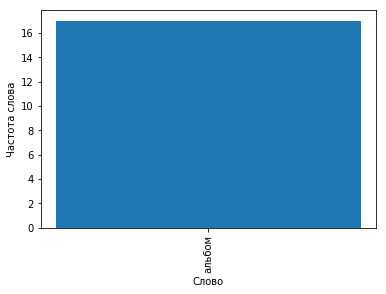

None


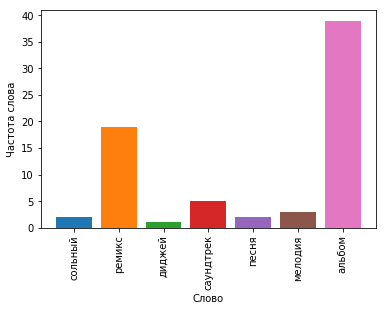

None


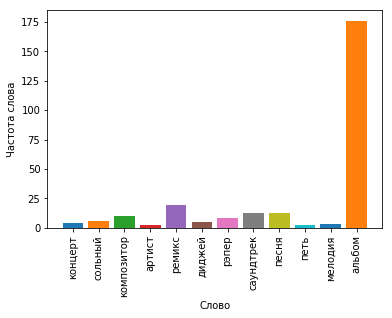

None


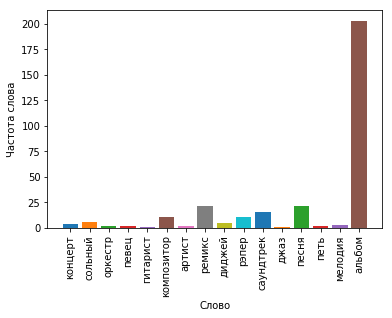

None


In [99]:
for group in groups:
        print(visual(group))